In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

# The Dataset

Since its creation in 2002, EFSA has produced risk assessments for more than 4,950 substances in over 2,000 
scientific opinions, statements and conclusions through the work of its scientists (see here).
Please make use of the SubstanceCharacterisation_KJ_2022 file (available here) and reply to the following
questions:

In [2]:
df = pd.read_excel('SubstanceCharacterisation_KJ_2022.xlsx')
df

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
0,_x0028__x0028_E_x0029_-2-_x0028_2-hydroxymethy...,as_x0020_such,_x0028__x0028_E_x0029_-2-_x0028_2-hydroxymethy...,NaN,NaN,C11H14N2O3,OCc1ccccc1_x002F_C_x0028__x003D_N_x005C_OC_x00...
1,_x0028__x0028_E_x0029_-2-_x0028_2-hydroxymethy...,metabolite,Dimoxystrobin,_x0031_49961-52-4,NaN,C19H22N2O3,CC1_x003D_CC_x0028__x003D_C_x0028_C_x003D_C1_x...
2,_x0028__x002B__x0029_-13alpha-Tigloyloxylupanine,as_x0020_such,_x0028__x002B__x0029_-13-alpha-Tigloyloxylupanine,_x0035_7943-34-7,NaN,C20H30N2O3,CC_x003D_C_x0028_C_x0029_C_x0028__x003D_O_x002...
3,_x0028__x002B__x0029_-13alpha-hydroxy-lupanine,as_x0020_such,_x0028__x002B__x0029_-13-Alpha-hydroxy-lupanine,_x0031_5358-48-2,NaN,C15H24N2O2,C1CC2C3CC_x0028_CN2C_x0028__x003D_O_x0029_C1_x...
4,_x0028__x002B__x0029_-Alpha-cedrene,as_x0020_such,_x0028__x002B__x0029_-Alpha-cedrene,_x0033_5964-52-4,NaN,C15H24,CC1_x003D_CCC23C_x005B_C_x0040_H_x005D_1C_x002...
...,...,...,...,...,...,...,...
7600,trans-3-Hexenyl_x0020_formate,as_x0020_such,trans-3-Hexenyl_x0020_formate,_x0035_6922-80-6,_x0032_60-442-7,C7H12O2,CC_x005C_C_x003D_C_x005C_CCOC_x003D_O
7601,trans-3-Hexenyl_x0020_hexanoate,as_x0020_such,trans-3-Hexenyl_x0020_hexanoate,_x0035_6922-82-8,_x0032_60-444-8,C12H22O2,CCCCCC_x0028__x003D_O_x0029_OCC_x005C_C_x003D_...
7602,trans-3-Methyl-2-_x0028_2-pentenyl_x0029_-2-cy...,as_x0020_such,trans-3-Methyl-2-_x0028_2-pentenyl_x0029_-2-cy...,_x0036_261-18-3,_x0032_28-410-7,C11H16O,CC_x005C_C_x003D_C_x005C_CC1_x003D_C_x0028_C_x...
7603,trans-6-Methyl-3-hepten-2-one,as_x0020_such,trans-6-Methyl-3-hepten-2-one,_x0032_0859-10-3,NaN,C8H14O,CC_x0028_C_x0029_C_x002F_C_x003D_C_x002F_C_x00...


By reading the excel file we are getting some troubles.
Let´s try to read the same dataset but in csv format

In [213]:
df = pd.read_csv('SubstanceCharacterisation_KJ_2022.csv', sep=';')
df

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
0,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,as such,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,NaN,NaN,C11H14N2O3,OCc1ccccc1/C(=N\OC)C(=O)NC
1,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,metabolite,Dimoxystrobin,149961-52-4,NaN,C19H22N2O3,CC1=CC(=C(C=C1)C)OCC2=CC=CC=C2C(=NOC)C(=O)NC
2,(+)-13alpha-Tigloyloxylupanine,as such,(+)-13-alpha-Tigloyloxylupanine,57943-34-7,NaN,C20H30N2O3,CC=C(C)C(=O)OC1CCN2CC3CC(C2C1)CN4C3CCCC4=O
3,(+)-13alpha-hydroxy-lupanine,as such,(+)-13-Alpha-hydroxy-lupanine,15358-48-2,NaN,C15H24N2O2,C1CC2C3CC(CN2C(=O)C1)C4CC(CCN4C3)O
4,(+)-Alpha-cedrene,as such,(+)-Alpha-cedrene,35964-52-4,NaN,C15H24,CC1=CCC23C[C@H]1C(C)(C)[C@H]3CC[C@@H]2C
...,...,...,...,...,...,...,...
7600,trans-3-Hexenyl formate,as such,trans-3-Hexenyl formate,56922-80-6,260-442-7,C7H12O2,CC\C=C\CCOC=O
7601,trans-3-Hexenyl hexanoate,as such,trans-3-Hexenyl hexanoate,56922-82-8,260-444-8,C12H22O2,CCCCCC(=O)OCC\C=C\CC
7602,trans-3-Methyl-2-(2-pentenyl)-2-cyclopenten-1-one,as such,trans-3-Methyl-2-(2-pentenyl)-2-cyclopenten-1-one,6261-18-3,228-410-7,C11H16O,CC\C=C\CC1=C(C)CCC1=O
7603,trans-6-Methyl-3-hepten-2-one,as such,trans-6-Methyl-3-hepten-2-one,20859-10-3,NaN,C8H14O,CC(C)C/C=C/C(=O)C


__Quick EDA__

In [4]:
df.shape

(7605, 7)

In [5]:
# See how many nan values are in the dataset as well other usefull information
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7605   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 7      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA        ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Substance                       │         0 │         0 │                       2.7 │                21000 │  │
│ │ has                             │         0 │         0 │                       2.7 │                21000 │  │
│ │ Component                       │         0 │         0 │                       2.7 │                21000 │  │
│ │ CASNumber                       │      1200 │        16 │                       2.7 │                21000 │  │
│ │ ECRefNo                         │      3200 │        42 │                       2.7 │                21000 │  │
│ │ MolecularFormula                │      1300 │        17 │                       2.7 │                21000 │  │
│ │ smiles                          │      1300 │        16 │                       2.7 │                21000 │  │
│ └─────────────────────────────────┴───────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

We have some missing values in the columns:

* CASNumber
* ECRefNo
* MolecularFormula
* smiles

In [6]:
# Let´s see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         7605 non-null   object
 1   has               7605 non-null   object
 2   Component         7605 non-null   object
 3   CASNumber         6366 non-null   object
 4   ECRefNo           4431 non-null   object
 5   MolecularFormula  6339 non-null   object
 6   smiles            6353 non-null   object
dtypes: object(7)
memory usage: 416.0+ KB


We are dealing only with categorical data

In [7]:
# Let´s analyse some features of this dataset
df.describe()

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
count,7605,7605,7605,6366,4431,6339,6353
unique,5146,16,5615,4528,3162,2648,4595
top,Grillin' 5078,as such,Zearalenone,17924-92-4,241-864-0,C10H16,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
freq,114,4538,22,22,22,90,22


In [8]:
df.columns

Index(['Substance', 'has', 'Component', 'CASNumber', 'ECRefNo',
       'MolecularFormula', 'smiles'],
      dtype='object')

In [9]:
# Number of observations/categories for each column
for i in df.columns:
    print('There are {} categories in the column {}'.format(df[i].nunique(),i))

There are 5146 categories in the column Substance
There are 16 categories in the column has
There are 5615 categories in the column Component
There are 4528 categories in the column CASNumber
There are 3162 categories in the column ECRefNo
There are 2648 categories in the column MolecularFormula
There are 4595 categories in the column smiles


_WordCloud_

Because we are dealing with categorical data let´s print a word cloud for each column to understand better the data and see the words most present in this dataset.


In [23]:
def word_cloud(column):
    # Get unique values from the specified column
    unique_values = df[column].unique()

    # Combine all unique values into a single string
    text = ' '.join(str(value) for value in unique_values)

    # Create word cloud
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color='white').generate(text)

    # Display the word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for {}'.format(column), fontweight=True, fontsize=16)
    plt.show()

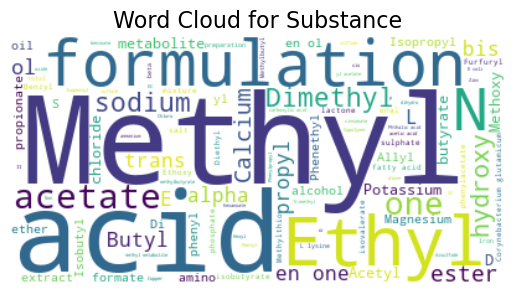

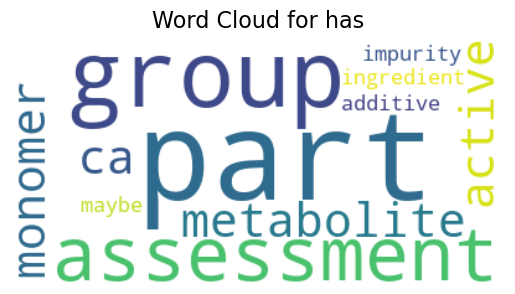

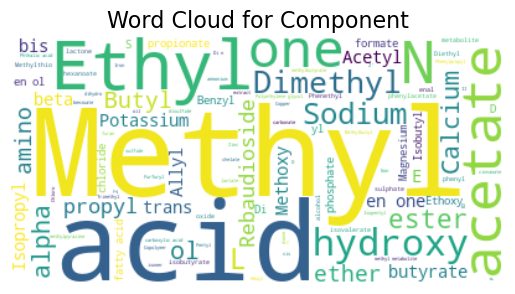

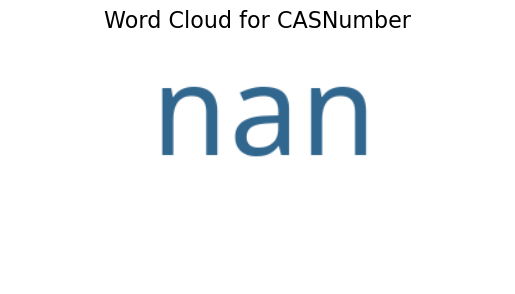

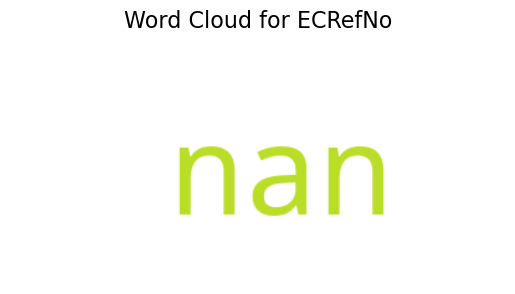

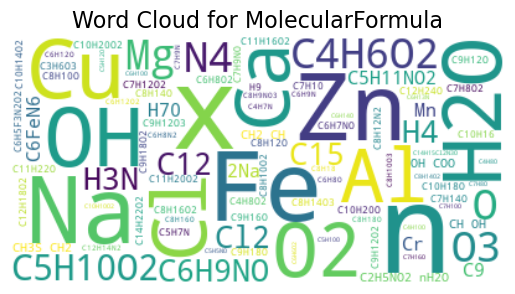

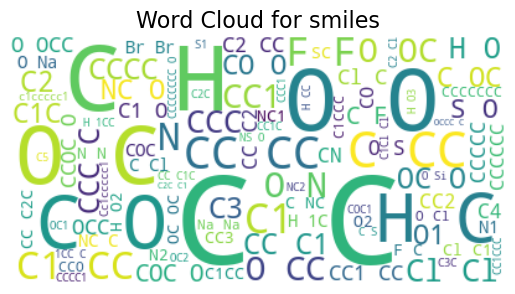

In [25]:
for i in df.columns:
    word_cloud(i)

# Questions

__1. How many components belong to the category “Metabolites” and “Active Substances”? Please provide 
a summary/table/graphical representation.__

In [75]:
# Number of Components in the dataset
df['has'].isnull().sum()

0

In [78]:
print('There are {} Components in the dataset'.format(df.shape[0]))

There are 7605 Components in the dataset


In [26]:
# Let´s count the unique values from the column has
df['has'].value_counts()

as such                         4538
part of                          875
part of group assessment         826
metabolite                       543
active ingredient                277
not part of group assessment     176
<=                               102
ca.                               71
>                                 71
maybe part of                     38
=                                 31
>=                                20
<                                 19
monomer                           15
impurity                           2
additive                           1
Name: has, dtype: int64

Let´s create a dataframe with the number of componentes belong to the category "Metabolites" and "Active Substances"

In [109]:
# Create a dataframe with only the metabolite or active ingredient
df_1 = df[ (df['has']=='metabolite') | (df['has']=='active ingredient')]

# Create a dataframe with the number of components belong to each category
df_ex1 = df_1.groupby('has').agg(Number_Components=('Component','nunique'))

# Reset index
df_ex1.reset_index(inplace=True)

# Order the column by the Number_Components
df_ex1.sort_values(by='Number_Components', ascending=False,inplace=True)

# Rename active ingedient as Active Substance and metabolite to Metabolites
df_ex1['has'] = df_ex1['has'].str.replace('active ingredient','Active Substance')
df_ex1['has'] = df_ex1['has'].str.replace('metabolite','Metabolites')

# Rename the column Number_Components as Number of Components and the column 'has' as 'Category'
df_ex1.rename(columns={'Number_Components':'Number of Unique Components',
                       'has':'Category'}, inplace=True)


# Display the dataframe
df_ex1

,Category,Number of Unique Components
0,Active Substance,205
1,Metabolites,163


In [102]:
# data to PowerBi
df_ex1.to_excel('df_ex1.xlsx',index=False)

In [ ]:
# Let´s see the total number of occurrences of each 'has' category and what it´s represents in terms of total components %

In [118]:
count_has = df_1.groupby('has').agg(Number_Components=('Component','count'))
count_has.reset_index(inplace=True)
count_has

,has,Number_Components
0,active ingredient,277
1,metabolite,543


In [114]:
df['Component'].count()

7605

In [122]:
# Let´s see what represents in terms of %
print('{}% of all the Componentes are Metabolites'.format(round((count_has[count_has['has']=='metabolite']['Number_Components'].sum() / df['Component'].count())*100)))
print('{}% of all the Componentes are Active Substances'.format(round((count_has[count_has['has']=='active ingredient']['Number_Components'].sum() / df['Component'].count())*100)))

7% of all the Componentes are Metabolites
4% of all the Componentes are Active Substances


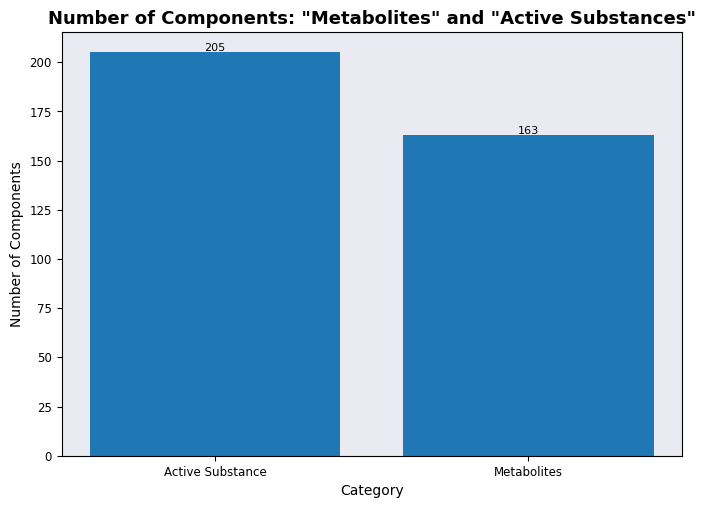

In [100]:
plt.figure(figsize=(8,5.5))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plot = plt.bar(df_ex1['Category'],df_ex1['Number of Components'])

plt.title('Number of Components: "Metabolites" and "Active Substances"', fontweight='bold', fontsize=13)

plt.xlabel('Category', fontsize=10)
plt.xticks(fontsize=8.5)

plt.ylabel('Number of Components',fontsize=10)
plt.yticks(fontsize=8.5)

for i in plot.patches:
    plt.annotate(
        i.get_height(),
        (i.get_x() + i.get_width() / 2, i.get_height()),
        ha="center",
        va="baseline",
        fontsize=8,
        color="black",
        xytext=(0, 1),
        textcoords="offset points"
    )

plt.show()

__2. Based on the above, how many Metabolites have/display the full list of chemical identifiers (i.e., 
CASNumber.; ECRefNo; Molecular Formula; SMILES)?__

Basically We want the metabolites without missing values

In [82]:
df.head()

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
0,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,as such,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,NaN,NaN,C11H14N2O3,OCc1ccccc1/C(=N\OC)C(=O)NC
1,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,metabolite,Dimoxystrobin,149961-52-4,NaN,C19H22N2O3,CC1=CC(=C(C=C1)C)OCC2=CC=CC=C2C(=NOC)C(=O)NC
2,(+)-13alpha-Tigloyloxylupanine,as such,(+)-13-alpha-Tigloyloxylupanine,57943-34-7,NaN,C20H30N2O3,CC=C(C)C(=O)OC1CCN2CC3CC(C2C1)CN4C3CCCC4=O
3,(+)-13alpha-hydroxy-lupanine,as such,(+)-13-Alpha-hydroxy-lupanine,15358-48-2,NaN,C15H24N2O2,C1CC2C3CC(CN2C(=O)C1)C4CC(CCN4C3)O
4,(+)-Alpha-cedrene,as such,(+)-Alpha-cedrene,35964-52-4,NaN,C15H24,CC1=CCC23C[C@H]1C(C)(C)[C@H]3CC[C@@H]2C


In [170]:
# Let´s get only the metabolites from the column has
metabolites = df[df['has']=='metabolite']
metabolites

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
1,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,metabolite,Dimoxystrobin,149961-52-4,NaN,C19H22N2O3,CC1=CC(=C(C=C1)C)OCC2=CC=CC=C2C(=NOC)C(=O)NC
38,(2-Amino-6-cyclopropyl-pyrimidin-4-yl)-methanol,metabolite,Cyprodinil,121552-61-2,601-785-8,C14H15N3,CC1=NC(NC3=CC=CC=C3)=NC(C2CC2)=C1
41,(2E)-3-(2-Anilino-6-methyl-4-pyrimidinyl)-2-pr...,metabolite,Mepanipyrim,110235-47-7,NaN,C14H13N3,CC#CC1=CC(=NC(=N1)NC2=CC=CC=C2)C
50,(2RS)- 2-[(dimethoxyphosphorothioyl)sulfanyl]-...,metabolite,Malathion,121-75-5,204-497-7,C10H19O6PS2,CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC
63,"(5-Chloro-2-methoxy-4-methyl-3-pyridinyl)(2,3-...",metabolite,Pyriofenone,688046-61-9,NaN,C18H20ClNO5,CC1=CC(=C(C(=C1C(=O)C2=C(C(=CN=C2OC)Cl)C)OC)OC)OC
...,...,...,...,...,...,...,...
7509,cis-beta-Zearalenol,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7510,cis-beta-Zearalenol glucopyranosides and sulfates,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7532,m-Toluidine,metabolite,Phenmedipham,13684-63-4,237-199-0,C16H16N2O4,O=C(NC2=CC(C)=CC=C2)OC1=CC(NC(OC)=O)=CC=C1
7536,o-Phthalic acid,metabolite,Dithianon,3347-22-6,222-098-6,C14H4N2O2S2,O=C1C2=C(SC(=C(S2)C#N)C#N)C(=O)c3ccccc13


In [171]:
# Let´s see the number of missing values from the metabolites data
metabolites.isnull().sum()

Substance             0
has                   0
Component             0
CASNumber            31
ECRefNo             274
MolecularFormula     38
smiles               51
dtype: int64

In [172]:
# Let´s drop missing values
metabolites_full_list = metabolites.dropna()
metabolites_full_list

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
38,(2-Amino-6-cyclopropyl-pyrimidin-4-yl)-methanol,metabolite,Cyprodinil,121552-61-2,601-785-8,C14H15N3,CC1=NC(NC3=CC=CC=C3)=NC(C2CC2)=C1
50,(2RS)- 2-[(dimethoxyphosphorothioyl)sulfanyl]-...,metabolite,Malathion,121-75-5,204-497-7,C10H19O6PS2,CCOC(=O)CC(SP(=S)(OC)OC)C(=O)OCC
158,({2-[(Ethoxymethyl)(2-ethyl-6-methylphenyl)ami...,metabolite,Acetochlor,34256-82-1,251-899-3,C14H20ClNO2,ClCC(=O)N(COCC)c1c(C)cccc1CC
165,"1,1,3,3-Tetramethylthiourea",metabolite,Thiram,137-26-8,205-286-2,C6H12N2S4,CN(C)C(=S)SSC(=S)N(C)C
237,"1,2,4-Triazole",metabolite,Amitrole,61-82-5,200-521-5,C2H4N4,C1=NNC(=N1)N
...,...,...,...,...,...,...,...
7509,cis-beta-Zearalenol,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7510,cis-beta-Zearalenol glucopyranosides and sulfates,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7532,m-Toluidine,metabolite,Phenmedipham,13684-63-4,237-199-0,C16H16N2O4,O=C(NC2=CC(C)=CC=C2)OC1=CC(NC(OC)=O)=CC=C1
7536,o-Phthalic acid,metabolite,Dithianon,3347-22-6,222-098-6,C14H4N2O2S2,O=C1C2=C(SC(=C(S2)C#N)C#N)C(=O)c3ccccc13


In [173]:
metabolites_full_list.isnull().sum()

Substance           0
has                 0
Component           0
CASNumber           0
ECRefNo             0
MolecularFormula    0
smiles              0
dtype: int64

In [174]:
# export to html
metabolites_full_list.to_html('Question_2.html',justify='center',index=False)

In [164]:
# data to power bi
metabolites_full_list.to_excel('ex_2.xlsx',index=False)

In [20]:
for i in metabolites.columns:
    print('There are {} {}s from the data with only metabolites that have the full list of chemical identifiers'.format(metabolites[i].nunique(),i))

There are 262 Substances from the data with only metabolites that have the full list of chemical identifiers
There are 1 hass from the data with only metabolites that have the full list of chemical identifiers
There are 73 Components from the data with only metabolites that have the full list of chemical identifiers
There are 73 CASNumbers from the data with only metabolites that have the full list of chemical identifiers
There are 73 ECRefNos from the data with only metabolites that have the full list of chemical identifiers
There are 72 MolecularFormulas from the data with only metabolites that have the full list of chemical identifiers
There are 73 smiless from the data with only metabolites that have the full list of chemical identifiers


In [175]:
# Create a dataframe with the number of unique substances and components with the full list of chemicals
ex_2 = metabolites_full_list.groupby('has').agg(Substances=('Substance','nunique'),
                              Components=('Component','nunique'))

# Reset index
ex_2.reset_index(inplace=True)

# Let´s drop the column has
ex_2.drop(columns=['has'],inplace=True)

# Let´s transpose the dataframe and rename the columns
ex_2 = ex_2.transpose().reset_index()

ex_2.rename(columns={'index':'Feature',
                      0:'Unique'},inplace=True)

ex_2

,Feature,Unique
0,Substances,262
1,Components,73


In [165]:
# data to power Bi
ex_2.to_excel('ex_2subst.xlsx',index=False)

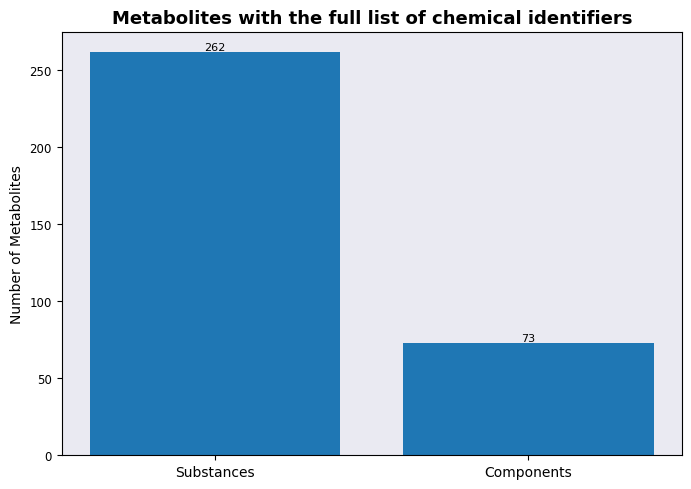

In [176]:
plt.figure(figsize=(8,5.5))

# Set background color
plt.gca().set_facecolor('#EAEAF2')

plot = plt.bar(ex_2['Feature'],ex_2['Unique'])

plt.title('Metabolites with the full list of chemical identifiers', fontweight='bold', fontsize=13)

plt.xticks(fontsize=10)

plt.ylabel('Number of Metabolites',fontsize=10)
plt.yticks(fontsize=8.5)

for i in plot.patches:
    plt.annotate(
        i.get_height(),
        (i.get_x() + i.get_width() / 2, i.get_height()),
        ha="center",
        va="baseline",
        fontsize=8,
        color="black",
        xytext=(0, 1),
        textcoords="offset points"
    )

plt.show()

Let´s see what the number of metabolites substances and components represent in terms of total % of metabolites

_Metabolites Substances_

In [203]:
print('In total there are {} unique metabolites substances'.format(metabolites['Substance'].nunique()))
print('There are {} unique metabolites substances with the full list of chemical identifiers'.format(metabolites_full_list['Substance'].nunique()))
print('{}% of all metabolites substances has the full list of chemical identifiers'.format(round((metabolites_full_list['Substance'].nunique()/metabolites['Substance'].nunique())*100)))

In total there are 521 unique metabolites substances
There are 262 unique metabolites substances with the full list of chemical identifiers
50% of all metabolites substances has the full list of chemical identifiers


In [257]:
# Create a Dataframe

# Calculate the unique substances for metabolites and metabolites_full_list
metabolites_unique = metabolites['Substance'].nunique()
metabolites_full_list_unique = metabolites_full_list['Substance'].nunique()

# Let´s get the number of unique substances whitout the full list
metaboliste_whitout_full_list = metabolites_unique - metabolites_full_list_unique

# Create a list of dictionaries
data = [
    {'Category': 'Metabolites Full List', 'Unique Substances': metabolites_full_list_unique},
    {'Category': 'Metabolites Whithout Full List', 'Unique Substances': metaboliste_whitout_full_list}]

# Create a DataFrame
ex_2_subts = pd.DataFrame(data)

# Display the dataframe
ex_2_subts

,Category,Unique Substances
0,Metabolites Full List,262
1,Metabolites Whithout Full List,259


In [263]:
# export to power bi
ex_2_subts.to_excel('ex_2_substances.xlsx',index=False)

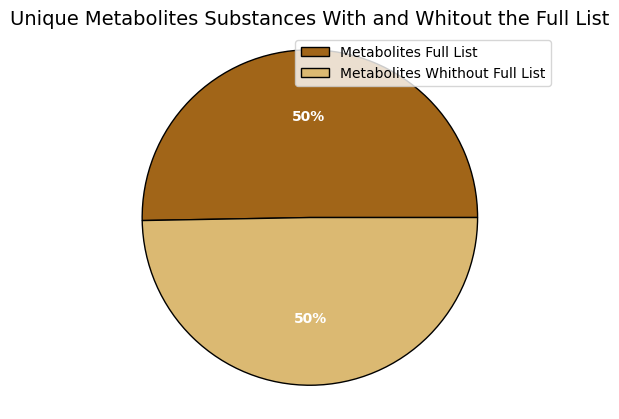

In [261]:
# create a Pie chart

# Set the colores
colors = sns.color_palette('BrBG')

# Create the pie chart
plt.pie(ex_2_subts['Unique Substances'], 
        labels = ex_2_subts['Category'],
        colors = colors, 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {'color':'white','fontweight':'bold'},
        autopct='%1.0f%%',
        explode=[0.0,0.0]
        )

plt.axis("equal")
plt.title("Unique Metabolites Substances With and Whitout the Full List",fontsize=14)
plt.legend(loc='best')

plt.show()

_Metabolites Components_

In [259]:
print('In total there are {} unique metabolites components'.format(metabolites['Component'].nunique()))
print('There are {} unique metabolites compinents with the full list of chemical identifiers'.format(metabolites_full_list['Component'].nunique()))
print('{}% of all metabolites components has the full list of chemical identifiers'.format(round((metabolites_full_list['Component'].nunique()/metabolites['Component'].nunique())*100)))

In total there are 163 unique metabolites components
There are 73 unique metabolites compinents with the full list of chemical identifiers
45% of all metabolites components has the full list of chemical identifiers


In [267]:
# Create a Dataframe

# Calculate the unique substances for metabolites and metabolites_full_list
metabolites_unique = metabolites['Component'].nunique()
metabolites_full_list_unique = metabolites_full_list['Component'].nunique()

# Let´s get the number of unique substances whitout the full list
metaboliste_whitout_full_list = metabolites_unique - metabolites_full_list_unique

# Create a list of dictionaries
data = [
    {'Category': 'Metabolites Full List', 'Unique Substances': metabolites_full_list_unique},
    {'Category': 'Metabolites Whithout Full List', 'Unique Substances': metaboliste_whitout_full_list}]

# Create a DataFrame
ex_2_comp = pd.DataFrame(data)

# Display the dataframe
ex_2_comp

,Category,Unique Substances
0,Metabolites Full List,73
1,Metabolites Whithout Full List,90


In [269]:
# export to power bi
ex_2_comp.to_excel('ex_2components.xlsx',index=False)

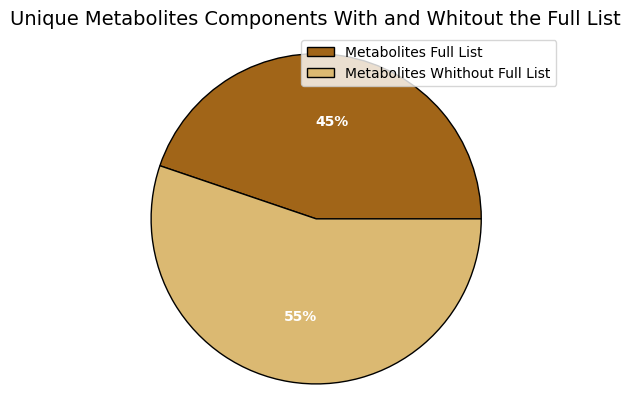

In [262]:
# create a Pie chart

# Set the colores
colors = sns.color_palette('BrBG')

# Create the pie chart
plt.pie(ex_2_comp['Unique Substances'], 
        labels = ex_2_comp['Category'],
        colors = colors, 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {'color':'white','fontweight':'bold'},
        autopct='%1.0f%%',
        explode=[0.0,0.0]
        )

plt.axis("equal")
plt.title("Unique Metabolites Components With and Whitout the Full List",fontsize=14)
plt.legend(loc='best')

plt.show()

__3. Are there substances which share the same CAS. N? If yes, please provide a summary/table/graphical 
representation and the possible reason for that__

In [21]:
# Let´s count the CASNumber to see if there arte substances with the same CAS number
df['CASNumber'].value_counts()

17924-92-4     22
21259-20-1     20
163515-14-8    16
97780-06-8     15
128639-02-1    14
               ..
10190-66-6      1
6300-61-4       1
16386-22-4      1
4553-89-3       1
89-80-5         1
Name: CASNumber, Length: 4528, dtype: int64

There are some substances with the same CAS number. Let´s this substances.

Bascially we want to get duplicates values from the column 'CASNumber' and count the unique 'Substance' values

In [56]:
# Let´s create a dataframe with duplicates CAS numbers
df_ex3 = df[df['CASNumber'].duplicated(keep=False)]

# Let´s drop nan values from CASNumber
df_ex3 = df_ex3.dropna(subset='CASNumber')

# Let´s count unique CASNumber
df_ex3 ['CASNumber'].value_counts()

17924-92-4     22
21259-20-1     20
163515-14-8    16
97780-06-8     15
128639-02-1    14
               ..
8062-15-5       2
63-25-2         2
16118-49-3      2
1563-66-2       2
156052-68-5     2
Name: CASNumber, Length: 961, dtype: int64

In [280]:
# let´s see if we have data with the same substance and the same CASNumber
df_ex3[df_ex3.duplicated(subset=['CASNumber', 'Substance'], keep=False)]

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
6242,Quinolizidine alkaloids,part of group assessment,(+)-Sparteine,90-39-1,201-988-8,C15H26N2,C1CCN2CC3CC(C2C1)CN4C3CCCC4
6252,Quinolizidine alkaloids,part of group assessment,(-)-Sparteine,90-39-1,201-988-8,C15H26N2,C1CCN2CC3CC(C2C1)CN4C3CCCC4


_Number of substances with the same CASNumber_

In [291]:
print('In total there are {} unique substances in this dataset'.format(df['Substance'].nunique()))
print('There are {} substances that share the same CAS number'.format(df_ex3['Substance'].nunique()))
print('{}% of substances from all the dataset share the same CASNumber'.format(round((df_ex3['Substance'].nunique()/df['Substance'].nunique())*100)))

In total there are 5146 unique substances in this dataset
There are 1779 substances that share the same CAS number
35% of substances from all the dataset share the same CASNumber


In [292]:
# Create a Dataframe

# Calculate the unique substances for metabolites and metabolites_full_list
subst_unique = df['Substance'].nunique()
subst_same_CASN = df_ex3['Substance'].nunique()

# Let´s get the number of unique substances whitout the full list
subst_dif_CASN = subst_unique - subst_same_CASN

# Create a list of dictionaries
data = [
    {'Substance': 'Same CAS Number', 'Unique Substances': subst_same_CASN},
    {'Substance': 'Different CAS Number', 'Unique Substances': subst_dif_CASN}]

# Create a DataFrame
ex_3_subst = pd.DataFrame(data)

# Display the dataframe
ex_3_subst

,Substance,Unique Substances
0,Same CAS Number,1779
1,Different CAS Number,3367


In [297]:
# data to powerBI
ex_3_subst.to_excel('Question_3_Pie.xlsx',index=False)

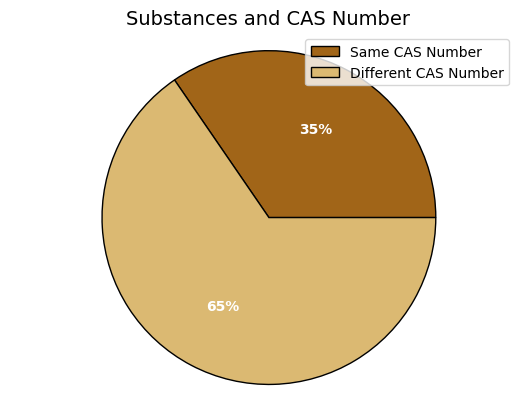

In [296]:
# create a Pie chart

# Set the colores
colors = sns.color_palette('BrBG')

# Create the pie chart
plt.pie(ex_3_subst['Unique Substances'], 
        labels = ex_3_subst['Substance'],
        colors = colors, 
        labeldistance = 1.1,
        wedgeprops = {"ec": "k"}, 
        textprops = {'color':'white','fontweight':'bold'},
        autopct='%1.0f%%',
        explode=[0.0,0.0]
        )

plt.axis("equal")
plt.title("Substances and CAS Number",fontsize=14)
plt.legend(loc='upper right')

plt.show()

In [272]:
#data to power bi
df_ex3.to_excel('Question_3.xlsx',index=False)

In [59]:
df_ex3['Substance'].value_counts()

Grillin' 5078                                         80
Grillin' CB-200SF                                     46
Residual fraction of expressed lemon oil              36
Essential oil from Elettaria cardamomum (L.) Maton    35
Expressed lemon oil                                   32
                                                      ..
Cyazofamid metabolite (DMSA)                           1
Cyazofamid metabolite (CTCA)                           1
Cyazofamid metabolite (CCIM-AM)                        1
Cyazofamid metabolite (CCIM)                           1
trans-3,7-Dimethylocta-2,6-dienal                      1
Name: Substance, Length: 1779, dtype: int64

In [60]:
print('There are {} CAS numbers'.format(df_ex3['CASNumber'].nunique()))

There are 961 CAS numbers


In [96]:
# Let's create a dataframe with the count of unique substances for each CAS number
cas_subst = df_ex3.groupby('CASNumber').agg(Number_Substances=('Substance','nunique'))

# Reset index
cas_subst.reset_index(inplace=True)

# Order the tabel by 'Number_Substances'
cas_subst.sort_values(by='Number_Substances',ascending=False, inplace=True)

# Rename the colum 'Number_Substances' to 'Number of Unique Substances'
cas_subst.rename(columns={'Number_Substances':'Number of Unique Substances'}, inplace=True)
cas_subst

,CASNumber,Number of Unique Substances
314,17924-92-4,22
347,21259-20-1,20
298,163515-14-8,16
943,97780-06-8,15
186,128639-02-1,14
...,...,...
403,26782-43-4,2
404,2682-20-4,2
407,2765-11-9,2
408,27742-38-7,2


In [270]:
# export data to html
cas_subst.to_html('Question_3_cas_unique_substances.html',index=False,justify='center')

In [62]:
# Let´s analyse some of the substances that share the same CAS number
df_ex3[df_ex3['CASNumber']=='999-97-3']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
4193,Hexamethyldisilazane,as such,Hexamethyldisilazane,999-97-3,213-668-5,C6H19NSi2,C[Si](C)(C)N[Si](C)(C)C
6513,Silicon dioxide coating (SiOx) formed from the...,monomer,Hexamethyldisilazane,999-97-3,213-668-5,C6H19NSi2,C[Si](C)(C)N[Si](C)(C)C


In [271]:
df_ex3[df_ex3['CASNumber']=='25999-20-6']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
4569,Lasalocid sodium,as such,Lasalocid sodium,25999-20-6,247-400-3,C34H54O8.Na,CCC(C1C(CC(O1)(CC)C2CCC(C(O2)C)(CC)O)C)C(=O)C(...
5241,Nilablend 200 G (lasalocid A sodium and nicarb...,part of,Lasalocid sodium,25999-20-6,247-400-3,C34H54O8.Na,CCC(C1C(CC(O1)(CC)C2CCC(C(O2)C)(CC)O)C)C(=O)C(...


In [29]:
df_ex3[df_ex3['CASNumber']=='17924-92-4']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
5004,Modified (masked) forms of zearalenone,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
5054,Mycotoxins,not part of group assessment,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7350,Zearalanone,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7351,Zearalanone glucopyranosides and sulfates,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7352,Zearalenone,as such,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7353,Zearalenone and its modified forms,part of group assessment,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7355,Zearalenone and its phase I/II metabolites,not part of group assessment,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7379,Zearalenone glucopyranosides and sulfates,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7455,alpha-Zearalanol,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O
7456,alpha-Zearalanol glucopyranosides and sulfates,metabolite,Zearalenone,17924-92-4,241-864-0,C18H22O5,C[C@H]1CCCC(=O)CCC/C=C/C2=CC(=CC(=C2C(=O)O1)O)O


In [30]:
df_ex3[df_ex3['CASNumber']=='21259-20-1']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
424,19-HO-T-2 toxin,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
1308,3-acetyl-T-2 toxin,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
1315,3-feruloyl-T-2 toxin,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
4998,Modified (masked) forms of T-2 and HT-2 toxins,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
5053,Mycotoxins,not part of group assessment,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
5215,Neosolaniol,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
5217,Neosolaniol-glucose,metabolite,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
6838,T-2 and HT-2 toxins,part of group assessment,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
6839,T-2 toxin,as such,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...
6852,"T-2 toxin, HT-2 toxin and its phase I/II metab...",part of group assessment,T-2 toxin,21259-20-1,244-297-7,C24H34O9,CC1=CC2C(CC1OC(=O)CC(C)C)(C3(C(C(C(C34CO4)O2)O...


In [31]:
df_ex3[df_ex3['CASNumber']=='163515-14-8']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
2916,Dimethenamid-ESA,metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2918,Dimethenamid-OXA,metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2919,Dimethenamid-P,as such,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2920,Dimethenamid-P formulation (BAS 656 12 H),active ingredient,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2922,Dimethenamid-P metabolite (M656H026),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2924,Dimethenamid-P metabolite (M656PH003),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2926,Dimethenamid-P metabolite (M656PH011),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2928,Dimethenamid-P metabolite (M656PH030),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2930,Dimethenamid-P metabolite (M656PH031),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C
2932,Dimethenamid-P metabolite (M656PH032),metabolite,Dimethenamid-P,163515-14-8,605-329-9,C12H18ClNO2S,CC1=CSC(=C1N([C@@H](C)COC)C(=O)CCl)C


In [32]:
df_ex3[df_ex3['CASNumber']=='8062-15-5']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
2319,Canthaxanth preparation (CAROPHYLL Red 10%),part of,Lignosulphonate,8062-15-5,617-129-9,NaN,NaN
4585,Lignosulphonate,as such,Lignosulphonate,8062-15-5,617-129-9,NaN,NaN


In [33]:
df_ex3[df_ex3['CASNumber']=='63-25-2']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
2333,Carbaryl,as such,Carbaryl,63-25-2,200-555-0,C12H11NO2,CNC(=O)Oc1cccc2ccccc12
2334,Carbaryl formulation,active ingredient,Carbaryl,63-25-2,200-555-0,C12H11NO2,CNC(=O)Oc1cccc2ccccc12


In [34]:
df_ex3[df_ex3['CASNumber']=='1002-53-5']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
2839,Dibutyltin,as such,Dibutyltin,1002-53-5,NaN,C8H18Sn,CCCC[Sn]CCCC
5365,"Organotin compounds (including TBT, DBT, TPT a...",part of group assessment,Dibutyltin,1002-53-5,NaN,C8H18Sn,CCCC[Sn]CCCC
5383,Organotin compounds (including n-octyltin comp...,part of group assessment,Dibutyltin,1002-53-5,NaN,C8H18Sn,CCCC[Sn]CCCC


In [35]:
df_ex3[df_ex3['CASNumber']=='99105-77-8']

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
709,2-Chloro-4-(methylsulfonyl)-benzoic acid,metabolite,Sulcotrione,99105-77-8,NaN,C14H13ClO5S,O=C2CCCC(=O)C2C(=O)c1ccc(cc1Cl)S(C)(=O)=O
6785,Sulcotrione,as such,Sulcotrione,99105-77-8,NaN,C14H13ClO5S,O=C2CCCC(=O)C2C(=O)c1ccc(cc1Cl)S(C)(=O)=O
6786,Sulcotrione formulation (300 SC),active ingredient,Sulcotrione,99105-77-8,NaN,C14H13ClO5S,O=C2CCCC(=O)C2C(=O)c1ccc(cc1Cl)S(C)(=O)=O


As we can see the substances with the same CAS number has the same component, ECRefNo, MolecularFormula and smile

In [64]:
# Let´s create a dataframe with the CASnumber and the respectively Component, ECRefNo, MolecularFormula and smile
casnumber = df_ex3.groupby('CASNumber').agg({
    'Component':'first', #'first' to keep the first value from each CASNumber
    'ECRefNo':'first',
    'MolecularFormula':'first',
    'smiles':'first'})

casnumber.reset_index(inplace=True)

casnumber

,CASNumber,Component,ECRefNo,MolecularFormula,smiles
0,100-52-7,Benzaldehyde,202-860-4,C7H6O,C1=CC=C(C=C1)C=O
1,100-75-4,N-nitrosopiperidine,202-886-6,C5H10N2O,C1CCN(CC1)N=O
2,100-86-7,2-Methyl-1-phenylpropan-2-ol,202-896-0,C10H14O,CC(O)(C)CC1=CC=CC=C1
3,1002-53-5,Dibutyltin,None,C8H18Sn,CCCC[Sn]CCCC
4,1003318-67-9,Oxathiapiprolin,801-263-1,C24H22F5N5O2S,Cc1cc(nn1CC(=O)N2CCC(CC2)c3nc(cs3)C4=NOC(C4)c5...
...,...,...,...,...,...
956,99-85-4,Gamma-terpinene,202-794-6,C10H16,CC1=CCC(=CC1)C(C)C
957,99-86-5,Alpha-terpinene,202-795-1,C10H16,CC1=CC=C(CC1)C(C)C
958,99-87-6,1-Isopropyl-4-methylbenzene,202-796-7,C10H14,CC1=CC=C(C=C1)C(C)C
959,99105-77-8,Sulcotrione,None,C14H13ClO5S,O=C2CCCC(=O)C2C(=O)c1ccc(cc1Cl)S(C)(=O)=O


In [66]:
# Let´s see missing values
casnumber.isnull().sum()

CASNumber             0
Component             0
ECRefNo             318
MolecularFormula     70
smiles               78
dtype: int64

In [301]:
# export to html
casnumber.to_html('Question_3.html',col_space=10,justify='left',index=False)

__4. Create one additional chart, table or visualisation that illustrates another interesting feature of the 
SubstanceCharacterisation_KJ_2022 file__

Number of Unique Substances, Components, CAS Numbers, ECREF Numbers, Molecular Formulas, and Smiles by Category

In [38]:
df.head()

,Substance,has,Component,CASNumber,ECRefNo,MolecularFormula,smiles
0,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,as such,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,NaN,NaN,C11H14N2O3,OCc1ccccc1/C(=N\OC)C(=O)NC
1,((E)-2-(2-hydroxymethylphenyl)-2-methoxyimino-...,metabolite,Dimoxystrobin,149961-52-4,NaN,C19H22N2O3,CC1=CC(=C(C=C1)C)OCC2=CC=CC=C2C(=NOC)C(=O)NC
2,(+)-13alpha-Tigloyloxylupanine,as such,(+)-13-alpha-Tigloyloxylupanine,57943-34-7,NaN,C20H30N2O3,CC=C(C)C(=O)OC1CCN2CC3CC(C2C1)CN4C3CCCC4=O
3,(+)-13alpha-hydroxy-lupanine,as such,(+)-13-Alpha-hydroxy-lupanine,15358-48-2,NaN,C15H24N2O2,C1CC2C3CC(CN2C(=O)C1)C4CC(CCN4C3)O
4,(+)-Alpha-cedrene,as such,(+)-Alpha-cedrene,35964-52-4,NaN,C15H24,CC1=CCC23C[C@H]1C(C)(C)[C@H]3CC[C@@H]2C


In [298]:
# Create a dataframe to count each unique substance, Component, CASNumber, ECRefNo, MolecularFormula and Smiles by has
df_ex4 = df.groupby('has').agg(Substance=('Substance','nunique'),
                     Component=('Component','nunique'),
                     CASNumber=('CASNumber','nunique'),
                     ECRefNo=('ECRefNo','nunique'),
                     MolecularFormula=('MolecularFormula','nunique'),
                     Smiles=('smiles','nunique'))

# Reset index
df_ex4.reset_index(inplace=True)

#Rename the columns
df_ex4.rename(columns={'has':'Category',
                      'Substance':'Number of Unique Substances',
                      'Component':'Number of Unique Components',
                      'CASNumber':'Number of Unique CAS Numbers',
                      'ECRefNo':'Number of Unique ECRefNo',
                      'MolecularFormula':'Number of Unique Molecular Formulas',
                      'Smiles':'Number of Unique Smiles'},inplace=True)

# Order the column by number of 'Subs'
df_ex4.sort_values(by='Number of Unique Substances',ascending=False, inplace=True)

# Let´s display the dataframe
df_ex4

,Category,Number of Unique Substances,Number of Unique Components,Number of Unique CAS Numbers,Number of Unique ECRefNo,Number of Unique Molecular Formulas,Number of Unique Smiles
7,as such,4538,4537,3764,2742,2196,3904
11,metabolite,521,163,150,74,143,146
5,active ingredient,269,205,186,121,175,175
14,part of,173,690,542,414,369,511
15,part of group assessment,98,738,603,304,444,563
13,not part of group assessment,46,156,117,68,102,100
1,<=,30,86,69,56,43,64
8,ca.,21,67,58,47,43,61
4,>=,13,20,18,11,15,14
2,=,12,28,27,23,26,27


In [302]:
df_ex4.to_html('Question_4.html',index=False,justify='center')